In [175]:
from matplotlib import pyplot
from matplotlib import cm
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [176]:
def stokes(psi, w, u, l1_target):
    
    l1norm = 1
    psi_n = numpy.empty_like(psi)
    w_n = numpy.empty_like(w)
    iterations = 0
    
    while l1norm > l1_target:
        
        psi_n = psi.copy()
        w_n = w.copy()
        
        psi[1:-1, 1:-1] = 1/(2*(dx**2 + dy**2))*\
                            ((psi_n[1:-1, 2:] + psi_n[1:-1, :-2])*dy**2 \
                           + (psi_n[2:, 1:-1] + psi_n[:-2, 1:-1])*dx**2 \
                           + w[1:-1, 1:-1]*dx**2*dy**2)
        
        w[1:-1, 1:-1] = 0.25 * (w_n[1:-1, :-2] + w_n[1:-1, 2:]\
                                + w_n[:-2, 1:-1] + w_n[2:, 1:-1])
              
        #Dirichlet B.C. are automatically enforced
        
        #Neumann B.C. for omega
        
        w[-1, 1:-1] = -1/(2*dy**2)*(8*psi[-2, 1:-1] - psi[-3, 1:-1]) \
                            - 3*u[1:-1]/dy #Top condition given
        w[1:-1, -1] = -1/(2*dx**2)*(8*psi[1:-1, -2] - psi[1:-1, -3])
        w[0, 1:-1] = -1/(2*dy**2)*(8*psi[1, 1:-1] - psi[2, 1:-1])
        w[1:-1, 0] = -1/(2*dx**2)*(8*psi[1:-1, 1] - psi[1:-1, 2])
        
        l1norm = L1norm(L1norm(w, w_n), L1norm(psi, psi_n))
        iterations += 1
          
    return psi, w

In [177]:
#Parameters
nx = 41
ny = 41

l = 1.
h = 1.

xmin = 0
xmax = l
ymin = 0
ymax = h

u = numpy.ones(nx)

dx = l/(nx-1)
dy = h/(ny-1)

#Mesh
x  = numpy.linspace(0,xmax,nx)
y  = numpy.linspace(ymin,ymax,ny)
X,Y = numpy.meshgrid(x,y)

#Initial conditions
psi = numpy.zeros((ny, nx)) #Create a XxY vector of zeros for psi
w = numpy.zeros((ny, nx)) #Create a XxY vector of zeros for omega (w)

l1_target = 1e-6

In [184]:
#GIven code
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [179]:
psi, w = stokes(psi, w, u, l1_target)

In [180]:
print("Solution array:")
numpy.round(psi[32,::8], 4)

Solution array:


array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])

In [181]:
psi_max = numpy.amax(numpy.absolute(psi))
print("Max value of psi:")
print(psi_max)

Max value of psi:
0.0998451726343


In [182]:
w_max = numpy.amax(numpy.absolute(w))
print("Max value of omega:")
print(w_max)

Max value of omega:
78.1926612287


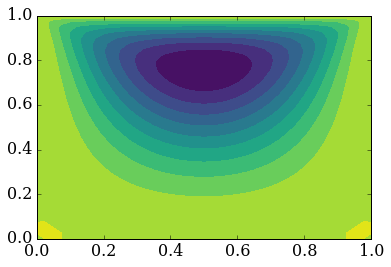

In [183]:
#Plot!
pyplot.contourf(x, y, psi, 10, cmap = cm.viridis);